In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2


In [6]:
!pip install scikit-learn==1.3.2

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


# Detailed Column Descriptions
bank client data:

1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [7]:
train_df = pd.read_csv(r"/content/train.csv",sep = ";")
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
test_df = pd.read_csv(r"/content/test.csv",sep = ";")
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
new_var = train_df.info()
new_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
train_df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [13]:
train_df['age'].value_counts()

,count
age,
32,2085
31,1996
33,1972
34,1930
35,1894
...,...
93,2
90,2
95,2


<Axes: xlabel='age', ylabel='count'>

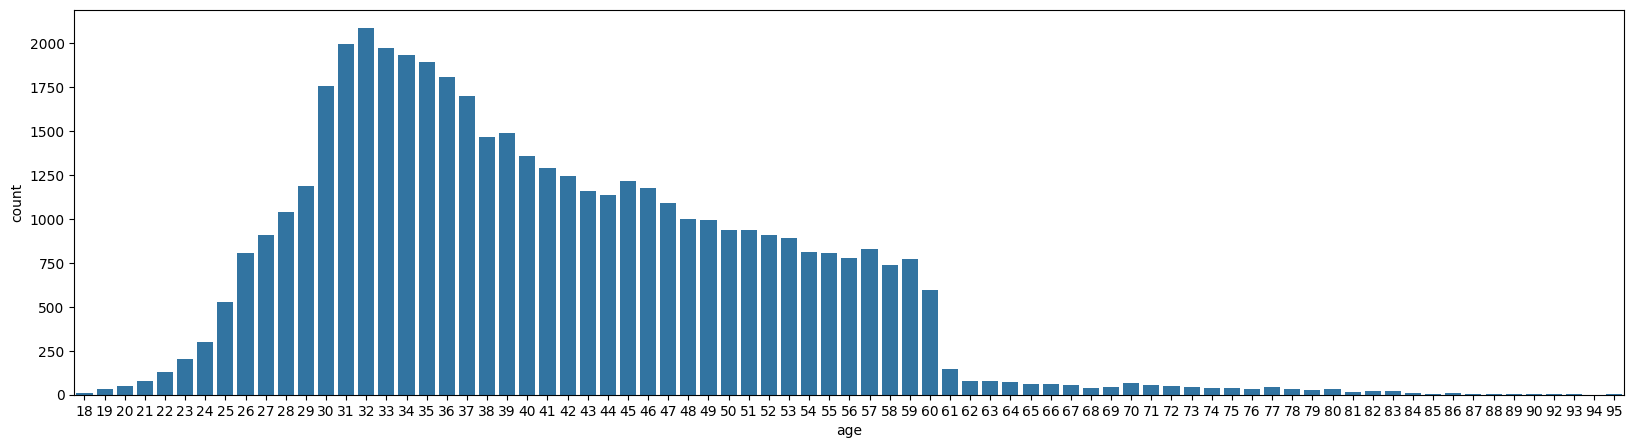

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(data = train_df,x = 'age')

In [15]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

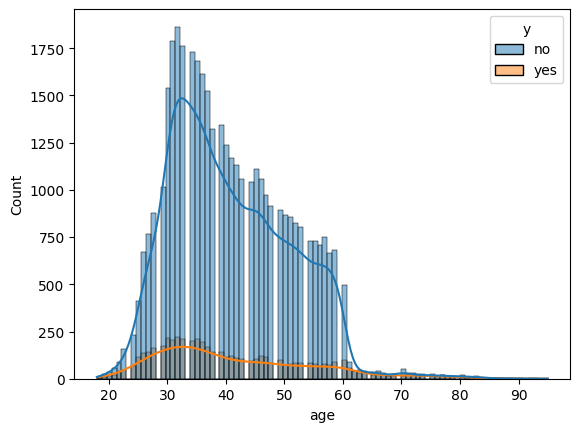

In [16]:
sns.histplot(data = train_df,x = 'age',kde = True,hue ='y' )

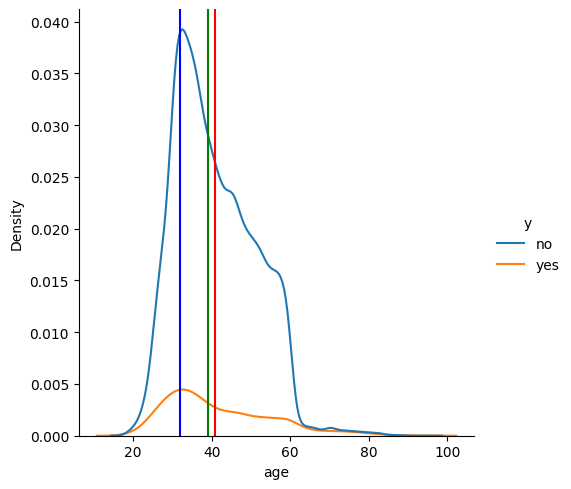

In [17]:
a = train_df['age']
a_mean = np.mean(a)
a_median = np.median(a)
a_mode = a.mode()[0]
a_mean,a_median,a_mode
sns.displot(data = train_df,x = a,kind = 'kde',hue = 'y')
plt.axvline(a_mean,color = 'r',label = 'mean')
plt.axvline(a_median,color = 'g',label = 'median')
plt.axvline(a_mode,color = 'b',label = 'mode')

<Axes: xlabel='age', ylabel='y'>

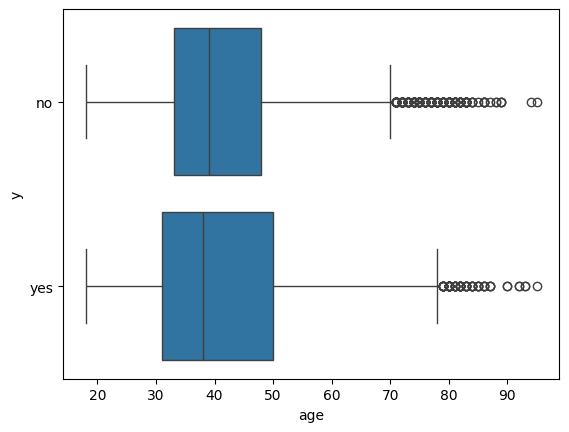

In [18]:
sns.boxplot(data = train_df,x = 'age',y = 'y')

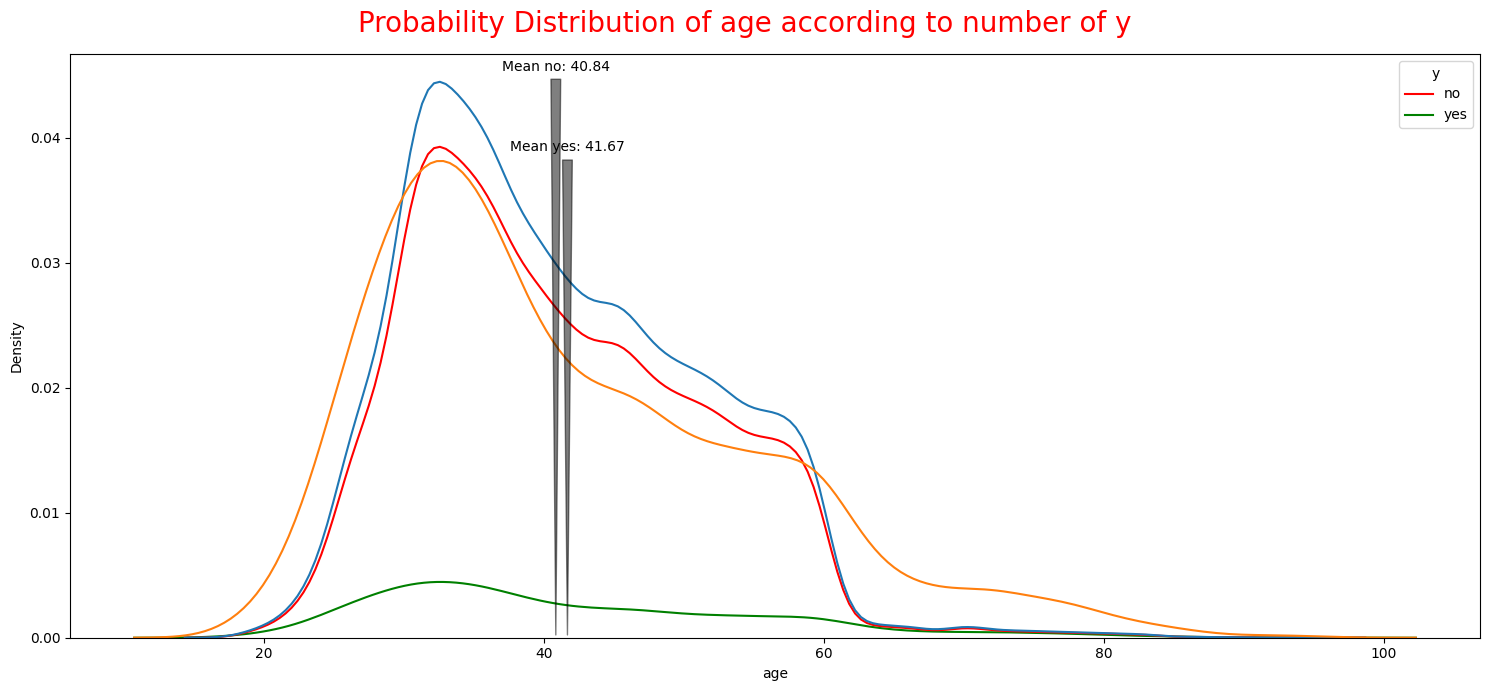

In [19]:
plt.figure(figsize=(15,7))
plt.suptitle("Probability Distribution of age according to number of y", fontsize=20, color="Red")

sns.kdeplot(data=train_df, x='age',hue = 'y',palette=['red', 'green'])
# Calculate and annotate the mean for each class
for cls in train_df['y'].unique():
    mean_value = train_df[train_df['y'] == cls]['age'].mean()
    max_density = sns.kdeplot(train_df[train_df['y'] == cls]['age']).get_lines()[-1].get_ydata().max()
    plt.annotate(f'Mean {cls}: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value, max_density + 0.02 * max_density),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [20]:
for cls in train_df['y'].unique():
    print(cls)

no
yes


0
no
1
yes


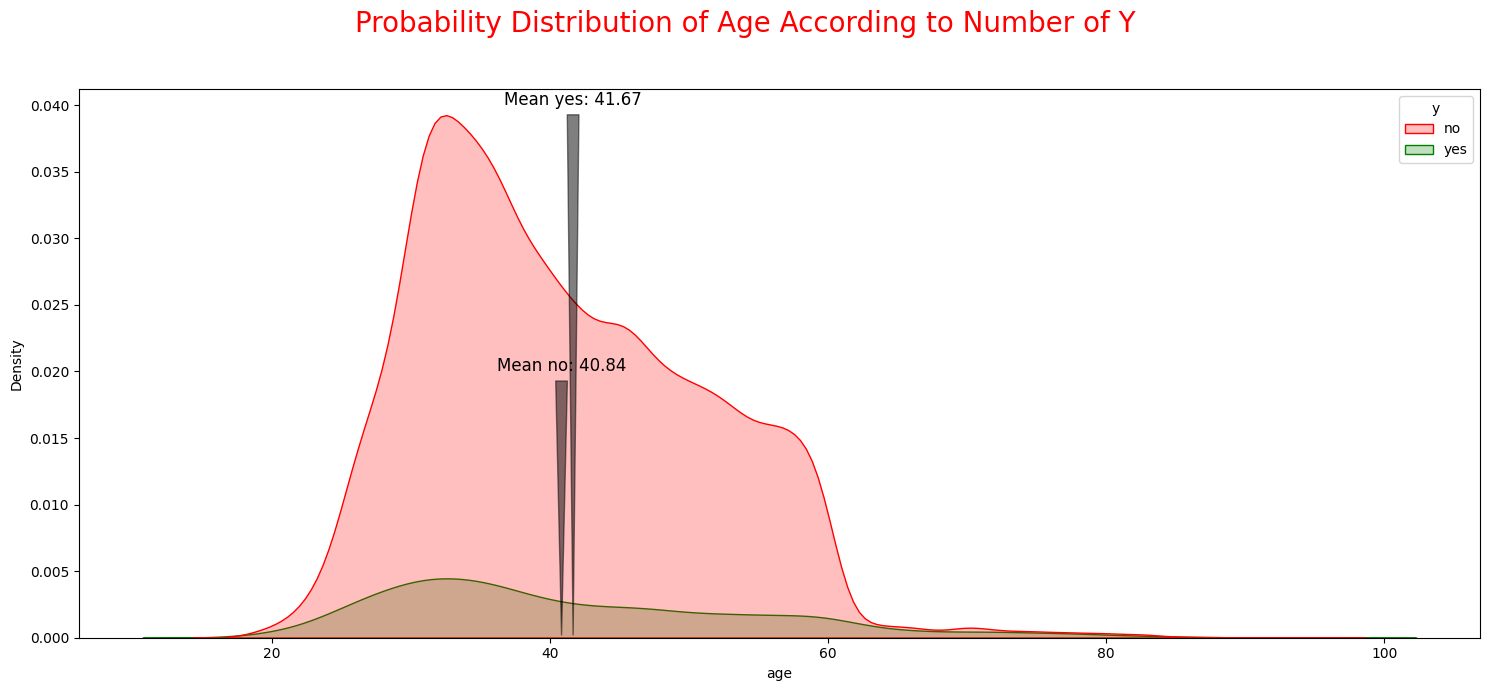

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
plt.suptitle("Probability Distribution of Age According to Number of Y", fontsize=20, color="Red")

# Create the KDE plot
sns.kdeplot(data=train_df, x='age', hue='y', palette=['red', 'green'], fill=True)

# Calculate and annotate the mean for each class
for idx, cls in enumerate(train_df['y'].unique()):
    print(idx)
    print(cls)
    mean_value = train_df[train_df['y'] == cls]['age'].mean()
    plt.annotate(f'Mean {cls}: {mean_value:.2f}',
                 xy=(mean_value, 0),
                 xytext=(mean_value, 0.02 + 0.02 * idx),  # Adjust text position to prevent overlap
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=12, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


Text(0.5, 1.0, 'QQ Plot')

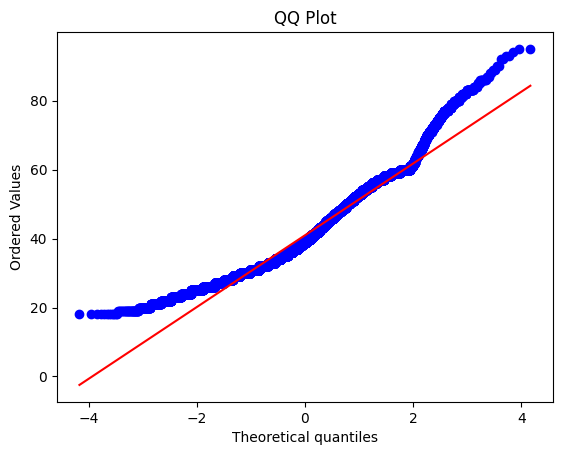

In [22]:
# Plot QQ plot
import scipy.stats as stats
stats.probplot(train_df['age'], dist="norm", plot=plt)
plt.title('QQ Plot')

In [23]:
test_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [24]:
# Apply log transformation to 'age' column in df
train_df['log-age'] = np.log1p(train_df['age'])
train_df['log-age']


,log-age
0,4.077537
1,3.806662
2,3.526361
3,3.871201
4,3.526361
...,...
45206,3.951244
45207,4.276666
45208,4.290459
45209,4.060443


In [25]:
test_df['log-age'] = np.log1p(test_df['age'])
test_df['log-age']

,log-age
0,3.433987
1,3.526361
2,3.583519
3,3.433987
4,4.094345
...,...
4516,3.526361
4517,4.060443
4518,4.060443
4519,3.367296


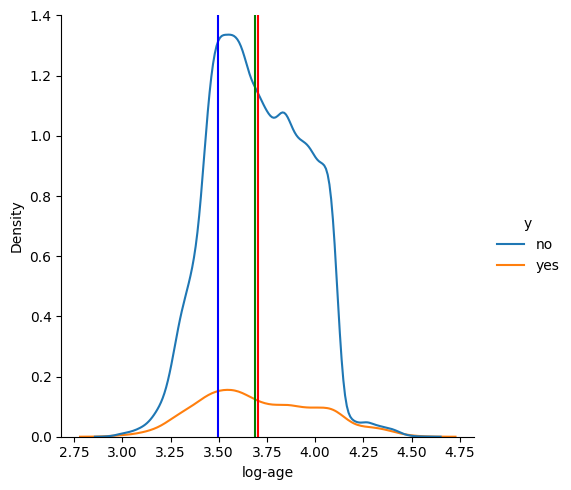

In [26]:
a = train_df['log-age']
a_mean = np.mean(a)
a_median = np.median(a)
a_mode = a.mode()[0]
a_mean,a_median,a_mode
sns.displot(data = train_df,x = a,kind = 'kde',hue = 'y')
plt.axvline(a_mean,color = 'r',label = 'mean')
plt.axvline(a_median,color = 'g',label = 'median')
plt.axvline(a_mode,color = 'b',label = 'mode')

Text(0.5, 1.0, 'QQ Plot')

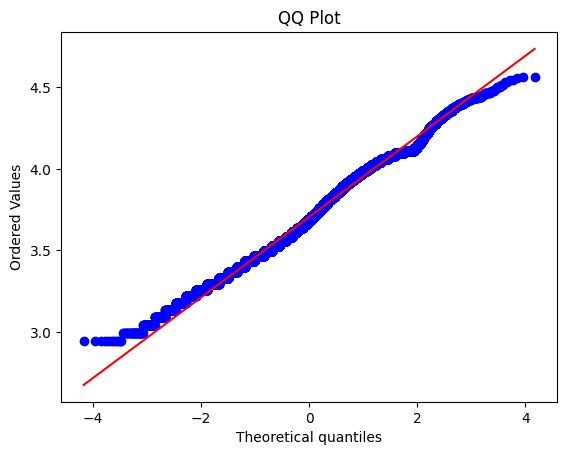

In [27]:
# Plot QQ plot
import scipy.stats as stats
stats.probplot(train_df['log-age'], dist="norm", plot=plt)
plt.title('QQ Plot')

In [28]:
from scipy.stats import boxcox
# Adding a constant to make the variable positive
positive_X = train_df['age'] + abs(train_df['age'].min()) + 1  # Add 1 to handle zero values

# Applying Box-Cox transformation for the column cap-diameter
transformed_X, lambda_value = boxcox(positive_X)

# Add the transformed values to your DataFrame
train_df['boxcox-transforme-age'] = transformed_X

In [29]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,log-age,boxcox-transforme-age
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4.077537,1.387699
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3.806662,1.376659
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3.526361,1.364587
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3.871201,1.379355
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,3.526361,1.364587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,3.951244,1.382644
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,4.276666,1.395293
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,4.290459,1.395801
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,4.060443,1.387025


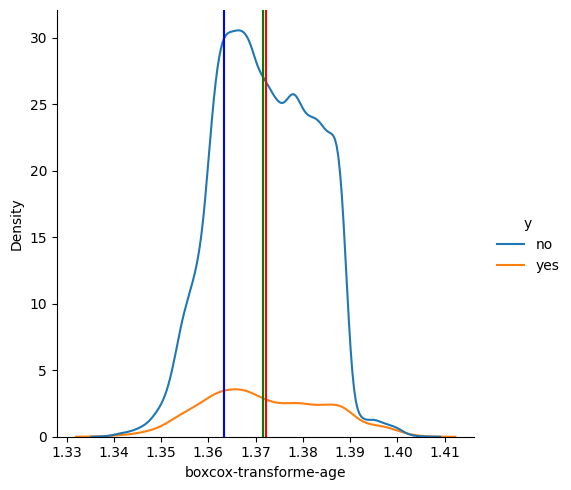

In [30]:
a = train_df['boxcox-transforme-age']
a_mean = np.mean(a)
a_median = np.median(a)
a_mode = a.mode()[0]
a_mean,a_median,a_mode
sns.displot(data = train_df,x = a,kind = 'kde',hue = 'y')
plt.axvline(a_mean,color = 'r',label = 'mean')
plt.axvline(a_median,color = 'g',label = 'median')
plt.axvline(a_mode,color = 'b',label = 'mode')


<Axes: xlabel='log-age', ylabel='y'>

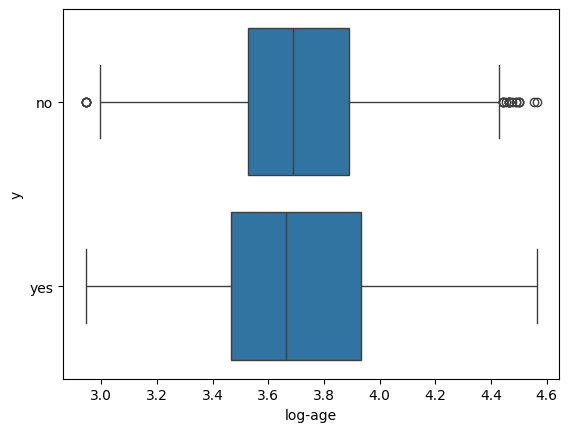

In [31]:
sns.boxplot(data = train_df,x = 'log-age',y = 'y')

In [32]:
train_df['job'].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [33]:
train_df['job'].value_counts()/train_df.shape[0]*100

,count
job,
blue-collar,21.525735
management,20.919688
technician,16.803433
admin.,11.437482
services,9.188029
retired,5.007631
self-employed,3.492513
entrepreneur,3.289023
unemployed,2.882042


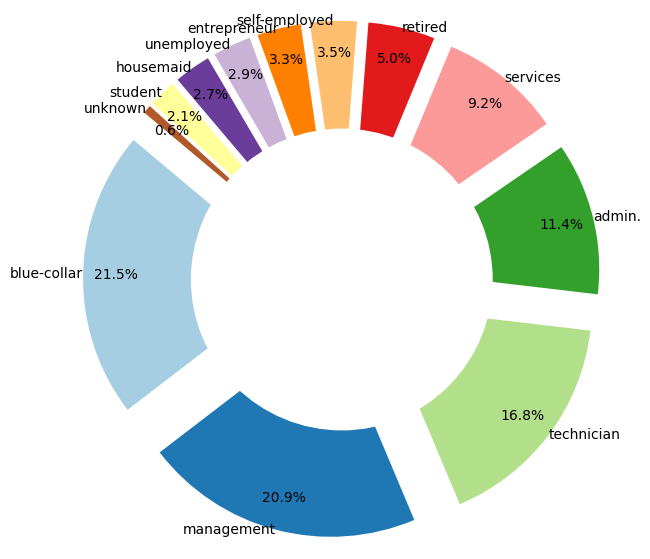

In [34]:
# Create the pie chart
plt.figure(figsize=(10, 7))
job_value_counts = train_df['job'].value_counts()
plt.pie(job_value_counts, labels=job_value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,pctdistance=.85,  # Distance of percentage labels from the center
        labeldistance=1,  # Distance of the labels from the center
        explode=[0.2] * len(job_value_counts))  # Slightly separate all slices)
# Add a circle in the middle to create a donut chart effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

<Axes: xlabel='job', ylabel='count'>

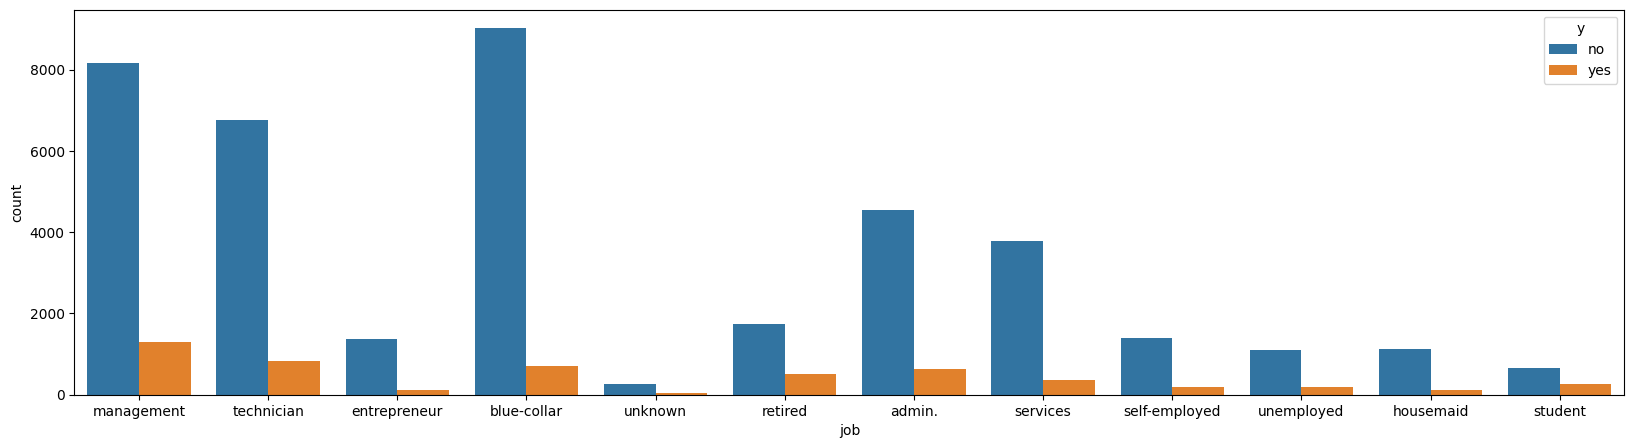

In [35]:
plt.figure(figsize = (20,5))
sns.countplot(data = train_df, x = 'job',hue = 'y')

In [36]:
# proportion of jobs roles who are interested for the term deposits
(train_df[train_df['y'] == 'yes']['job'].value_counts()/train_df[train_df['y'] == 'no']['job'].value_counts()).sort_values(ascending = False)*100

,count
job,
student,40.209268
retired,29.519451
unemployed,18.346957
management,15.949491
admin.,13.898678
self-employed,13.433908
unknown,13.385827
technician,12.431552
services,9.749009


In [37]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age'],
      dtype='object')

In [38]:
train_df['marital'].value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


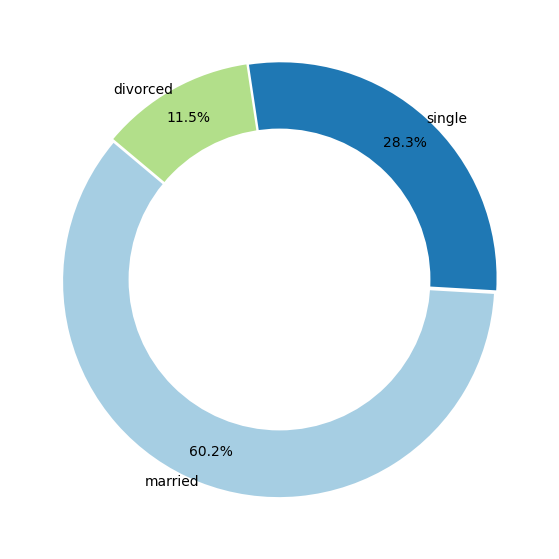

In [39]:
# Create the pie chart
plt.figure(figsize=(10, 7))
job_value_counts = train_df['marital'].value_counts()
plt.pie(job_value_counts, labels=job_value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,pctdistance=.85,  # Distance of percentage labels from the center
        labeldistance=1,  # Distance of the labels from the center
        explode=[0.01] * len(job_value_counts))  # Slightly separate all slices)
# Add a circle in the middle to create a donut chart effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

<Axes: xlabel='marital', ylabel='count'>

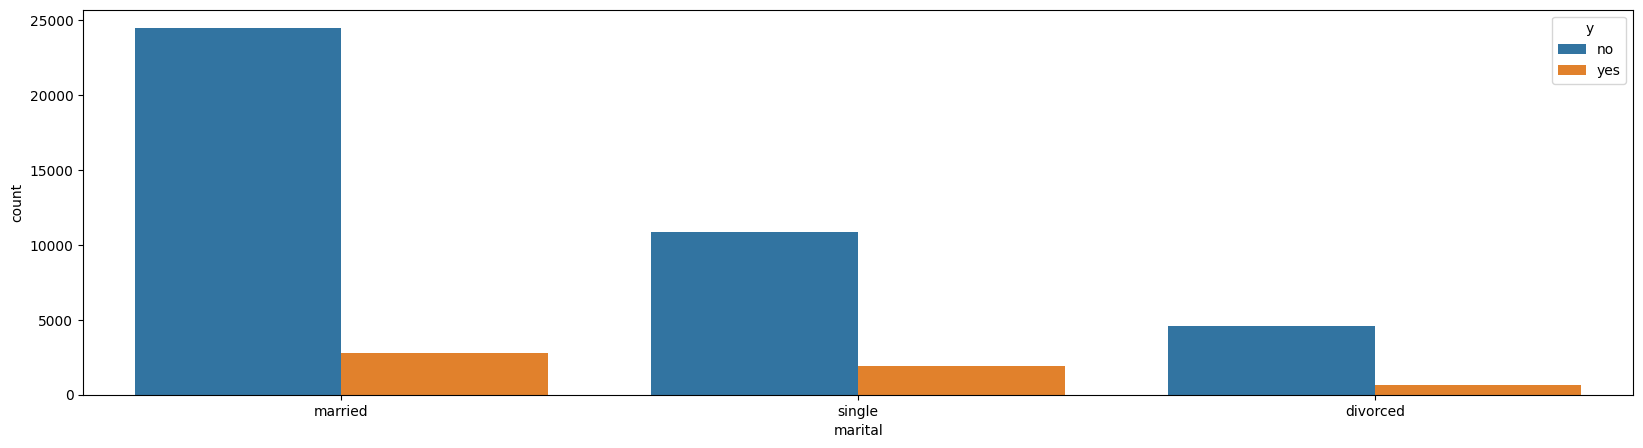

In [40]:
plt.figure(figsize = (20,5))
sns.countplot(data = train_df, x = 'marital',hue = 'y')

In [41]:
train_df[train_df['y']=='yes']['marital'].value_counts()/train_df[train_df['y']=='no']['marital'].value_counts()*100

,count
marital,
married,11.263747
single,17.576760
divorced,13.565976


In [42]:
train_df[train_df['y']=='yes']['marital'].value_counts()/train_df['marital'].value_counts()*100

,count
marital,
married,10.123466
single,14.949179
divorced,11.945458


In [43]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age'],
      dtype='object')

In [44]:
train_df['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


<Axes: xlabel='education', ylabel='count'>

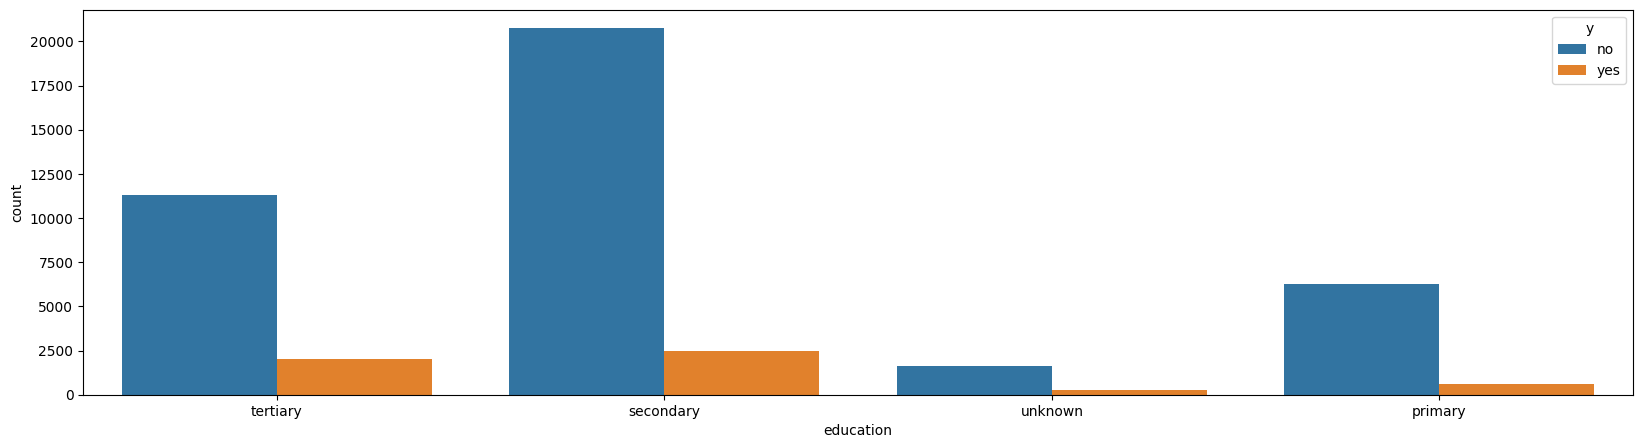

In [45]:
plt.figure(figsize = (20,5))
sns.countplot(data = train_df, x = 'education',hue = 'y')

In [46]:
train_df[train_df['y']=='yes']['education'].value_counts()/train_df[train_df['y']=='no']['education'].value_counts()*100

,count
education,
secondary,11.806091
tertiary,17.655904
primary,9.440895
unknown,15.700935


In [47]:
train_df['default'].value_counts()

,count
default,
no,44396
yes,815


<Axes: xlabel='balance', ylabel='Count'>

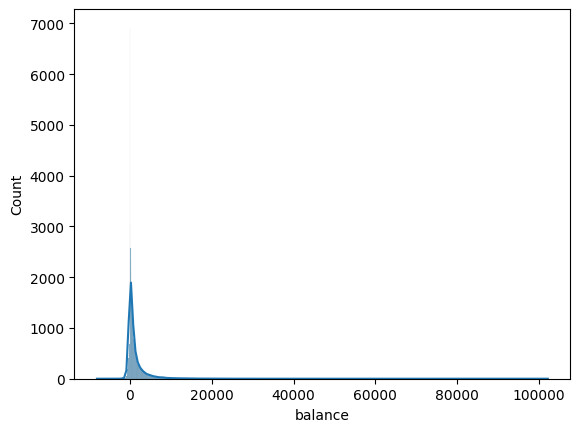

In [48]:
sns.histplot(data = train_df, x= 'balance',kde = True)

In [49]:
train_df['balance'].loc[train_df['balance']==0].value_counts()

,count
balance,
0,3514


In [50]:
test_df['balance'].loc[test_df['balance']==0].value_counts()

,count
balance,
0,357


In [51]:
test_df['balance'].loc[test_df['balance']==0].value_counts()

,count
balance,
0,357


In [52]:
train_df['balance'].sort_values()

,balance
12909,-8019
15682,-6847
38736,-4057
7413,-3372
1896,-3313
...,...
41693,71188
42558,81204
43393,81204
26227,98417


<Axes: xlabel='age', ylabel='balance'>

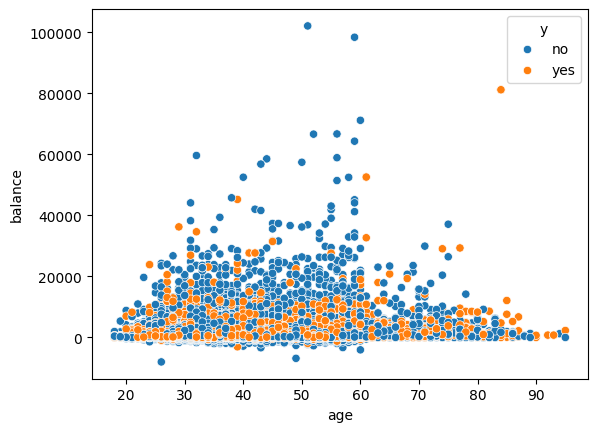

In [53]:
sns.scatterplot(data = train_df, x = 'age', y = 'balance',hue = 'y')

<Axes: xlabel='balance'>

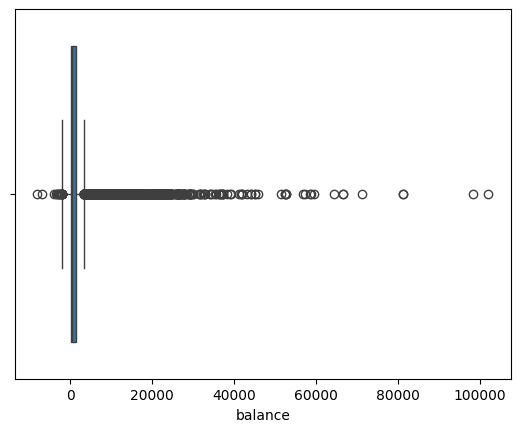

In [54]:
sns.boxplot(data = train_df, x = 'balance')

In [55]:
train_df['balance_log'] = np.log1p(train_df['balance'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
test_df['balance_log'] = np.log1p(test_df['balance'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='balance_log', ylabel='Count'>

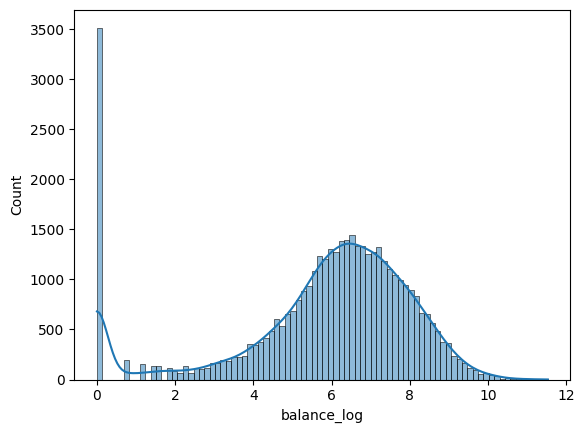

In [57]:
sns.histplot(data = train_df, x= 'balance_log',kde = True)

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
train_df['balance_power'] = pt.fit_transform(train_df[['balance']])

In [59]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
test_df['balance_power'] = pt.fit_transform(test_df[['balance']])

<Axes: xlabel='balance_power', ylabel='Count'>

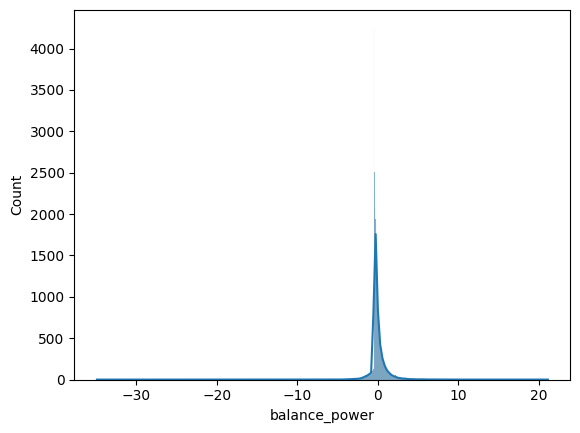

In [60]:
sns.histplot(data = train_df, x= 'balance_power',kde = True)

In [61]:
threshold = 1e-5  # This threshold can be adjusted based on your specific needs
# Step 2: Create a binary flag for zero or near-zero balances
train_df['balance_zero_flag'] = (train_df['balance'] <= threshold).astype(int)
train_df['balance_zero_flag'].value_counts()

,count
balance_zero_flag,
0,37931
1,7280


In [62]:
threshold = 1e-5  # This threshold can be adjusted based on your specific needs
# Step 2: Create a binary flag for zero or near-zero balances
test_df['balance_zero_flag'] = (test_df['balance'] <= threshold).astype(int)
test_df['balance_zero_flag'].value_counts()

,count
balance_zero_flag,
0,3798
1,723


<Axes: xlabel='balance_transformed', ylabel='Count'>

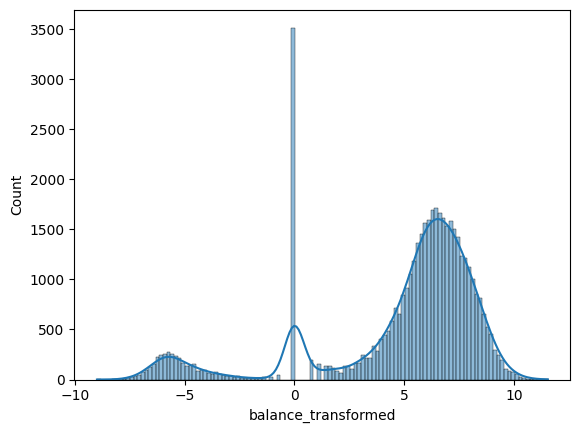

In [63]:
def transformation_balance(x):
    if x>threshold:
        return np.log1p(x)
    elif x< -threshold:
        return -np.log1p(-x)
    else:
        return x
train_df['balance_transformed'] = train_df['balance'].apply(lambda x:transformation_balance(x))


sns.histplot(data = train_df['balance_transformed'],kde = True)


In [64]:
test_df['balance_transformed'] = test_df['balance'].apply(lambda x:transformation_balance(x))


In [65]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,log-age,boxcox-transforme-age,balance_log,balance_power,balance_zero_flag,balance_transformed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,4.077537,1.387699,7.670429,0.414773,0,7.670429
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,3.806662,1.376659,3.401197,-0.410774,0,3.401197
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,3.526361,1.364587,1.098612,-0.431122,0,1.098612
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,3.871201,1.379355,7.317876,0.197685,0,7.317876
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,3.526361,1.364587,0.693147,-0.432119,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,-1,0,unknown,yes,3.951244,1.382644,6.716595,-0.052398,0,6.716595
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,-1,0,unknown,yes,4.276666,1.395293,7.455877,0.275122,0,7.455877
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,184,3,success,yes,4.290459,1.395801,8.651025,1.495765,0,8.651025
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,-1,0,unknown,no,4.060443,1.387025,6.505784,-0.114235,0,6.505784


In [66]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age',
       'balance_log', 'balance_power', 'balance_zero_flag',
       'balance_transformed'],
      dtype='object')

In [67]:
test_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'balance_log', 'balance_power',
       'balance_zero_flag', 'balance_transformed'],
      dtype='object')

In [68]:
train_df['housing'].value_counts()

,count
housing,
yes,25130
no,20081


In [69]:
pd.crosstab(train_df['job'],train_df['y'],normalize = 'index')

y,no,yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


In [70]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age',
       'balance_log', 'balance_power', 'balance_zero_flag',
       'balance_transformed'],
      dtype='object')

In [71]:
train_df['loan'].value_counts()

,count
loan,
no,37967
yes,7244


In [72]:
train_df['pdays'].value_counts()

,count
pdays,
-1,36954
182,167
92,147
91,126
183,126
...,...
449,1
452,1
648,1


In [73]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(train_df['loan'], train_df['y'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 209.61698034978633
P-Value: 1.665061163492756e-47
Degrees of Freedom: 1
Expected Frequencies:
[[33525.4379244  4441.5620756]
 [ 6396.5620756   847.4379244]]


1. Chi-Square Statistic: 209.61698034978633
The Chi-Square statistic (χ²) is a measure of how much the observed frequencies deviate from the expected frequencies.
A larger Chi-Square value indicates a greater difference between the observed and expected data, suggesting a stronger association between the two variables.
In your case, a Chi-Square statistic of 209.62 is quite large, which implies that there is a significant difference between the observed and expected frequencies.
2. P-Value: 1.665061163492756e-47
The p-value is the probability that the observed data (or something more extreme) would occur if the null hypothesis were true (i.e., if the two variables were independent).
The p-value here is 1.665061163492756e-47, which is a very small number, approximately 0.00000000000000000000000000000000000000000001665.
Such a small p-value indicates that the probability of observing the data under the assumption of independence is extremely low. Therefore, you would reject the null hypothesis with a very high level of confidence.
This suggests that there is a statistically significant association between the two variables.
3. Degrees of Freedom: 1
The degrees of freedom (df) represent the number of independent values that can vary in your data analysis, taking into account any constraints.
In a Chi-Square test, degrees of freedom are calculated as:
𝑑
𝑓
=
(
𝑟
−
1
)
×
(
𝑐
−
1
)
df=(r−1)×(c−1)
where
𝑟
r is the number of rows (categories for the first variable) and
𝑐
c is the number of columns (categories for the second variable).
In your case,
𝑑
𝑓
=
1
df=1 suggests that the test involved comparing two binary categories (2 rows and 2 columns).
4. Expected Frequencies:
The expected frequencies are the counts you would expect in each cell of the contingency table if the two variables were independent.
The table provided shows the expected counts for each combination of categories:
Expected Frequencies
=
[
33525.44
4441.56
6396.56
847.44
]
Expected Frequencies=[
33525.44
6396.56
​
  
4441.56
847.44
​
 ]
33525.44: Expected count in the first row and first column.
4441.56: Expected count in the first row and second column.
6396.56: Expected count in the second row and first column.
847.44: Expected count in the second row and second column.
These are calculated using the formula:
Expected Frequency
=
(
Row Total
)
×
(
Column Total
)
Grand Total
Expected Frequency=
Grand Total
(Row Total)×(Column Total)
​



In [74]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(train_df['marital'], train_df['y'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 196.49594565603957
P-Value: 2.1450999986791792e-43
Degrees of Freedom: 2
Expected Frequencies:
[[ 4597.86012254   609.13987746]
 [24030.37552808  3183.62447192]
 [11293.76434938  1496.23565062]]


In [75]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(train_df['job'], train_df['y'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 836.1054877471965
P-Value: 3.337121944935502e-172
Degrees of Freedom: 11
Expected Frequencies:
[[4566.0715755   604.9284245 ]
 [8593.5038818  1138.4961182 ]
 [1313.04359559  173.95640441]
 [1094.93884232  145.06115768]
 [8351.55771825 1106.44228175]
 [1999.14640242  264.85359758]
 [1394.28099356  184.71900644]
 [3668.04512176  485.95487824]
 [ 828.2682533   109.7317467 ]
 [6708.26643958  888.73356042]
 [1150.56879963  152.43120037]
 [ 254.30837628   33.69162372]]


In [76]:
pd.crosstab(train_df['loan'],train_df['y'],normalize='index')

y,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [77]:
train_df['contact'].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


<Axes: xlabel='contact', ylabel='count'>

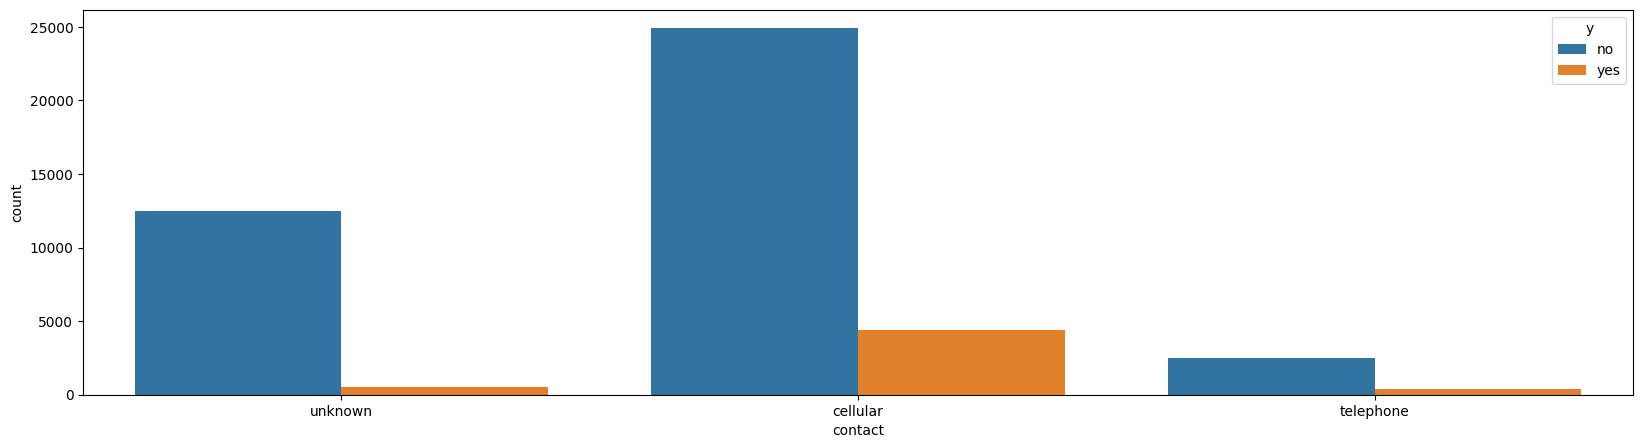

In [78]:
plt.figure(figsize = (20,5))
sns.countplot(data = train_df, x = 'contact',hue = 'y')

In [79]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(train_df['contact'], train_df['y'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 1035.714225356292
P-Value: 1.251738325340638e-225
Degrees of Freedom: 2
Expected Frequencies:
[[25859.09999779  3425.90000221]
 [ 2566.04215788   339.95784212]
 [11496.85784433  1523.14215567]]


In [80]:
train_df['day'].value_counts()

,count
day,
20,2752
18,2308
21,2026
17,1939
6,1932
5,1910
14,1848
8,1842
28,1830


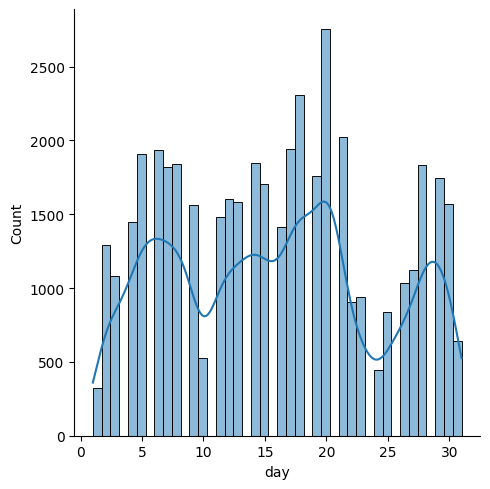

In [81]:
sns.displot(data = train_df,x = 'day',kde = True)

In [82]:
def map_week(day):
    if day>=1 and day<=7:
        return 1
    elif day>=8 and day<=14:
        return 2
    elif day>=15 and day <=21:
        return 3
    elif day>=22 and day<=28:
        return 4
    else:
        return 5
train_df['weeks'] = train_df['day'].apply(lambda x:map_week(x))



In [83]:
train_df
test_df['weeks'] = test_df['day'].apply(lambda x:map_week(x))
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,log-age,balance_log,balance_power,balance_zero_flag,balance_transformed,weeks
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,-1,0,unknown,no,3.433987,7.488853,0.282211,0,7.488853,3
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,339,4,failure,no,3.526361,8.474286,1.209846,0,8.474286,2
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,330,1,failure,no,3.583519,7.208600,0.130429,0,7.208600,3
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,-1,0,unknown,no,3.433987,7.297768,0.174936,0,7.297768,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,-1,0,unknown,no,4.094345,0.000000,-0.445382,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,-1,0,unknown,no,3.526361,NaN,-1.340442,1,-5.811141,5
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,-1,0,unknown,no,4.060443,NaN,-13.487834,1,-8.105911,2
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,-1,0,unknown,no,4.060443,5.690359,-0.283836,0,5.690359,3
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,211,3,other,no,3.367296,7.037028,0.053555,0,7.037028,1


In [84]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age',
       'balance_log', 'balance_power', 'balance_zero_flag',
       'balance_transformed', 'weeks'],
      dtype='object')

In [85]:
train_df['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


In [86]:
train_df['duration'].value_counts()

,count
duration,
124,188
90,184
89,177
104,175
122,175
...,...
1833,1
1545,1
1352,1


<Figure size 2000x1000 with 0 Axes>

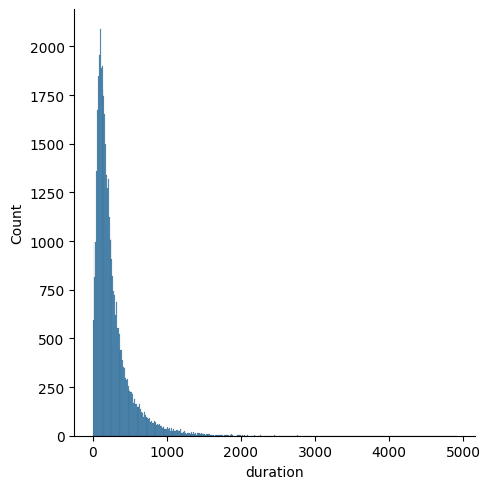

In [87]:
plt.figure(figsize = (20,10))
sns.displot(data = train_df,x = 'duration')

In [88]:
train_df[train_df['campaign']==63]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,log-age,boxcox-transforme-age,balance_log,balance_power,balance_zero_flag,balance_transformed,weeks
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,...,0,unknown,no,3.828641,1.377581,9.110741,2.401957,0,9.110741,3


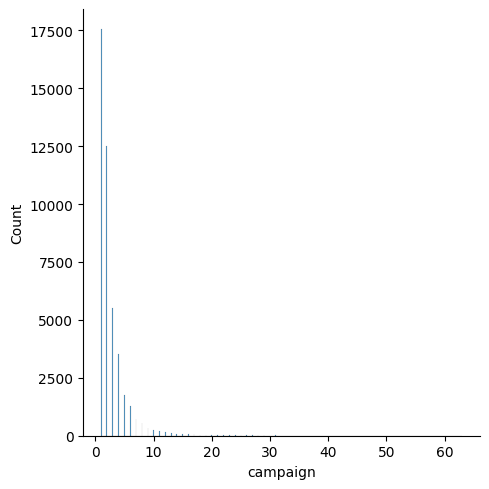

In [89]:
sns.displot(data = train_df,x = 'campaign')

<Axes: xlabel='campaign', ylabel='count'>

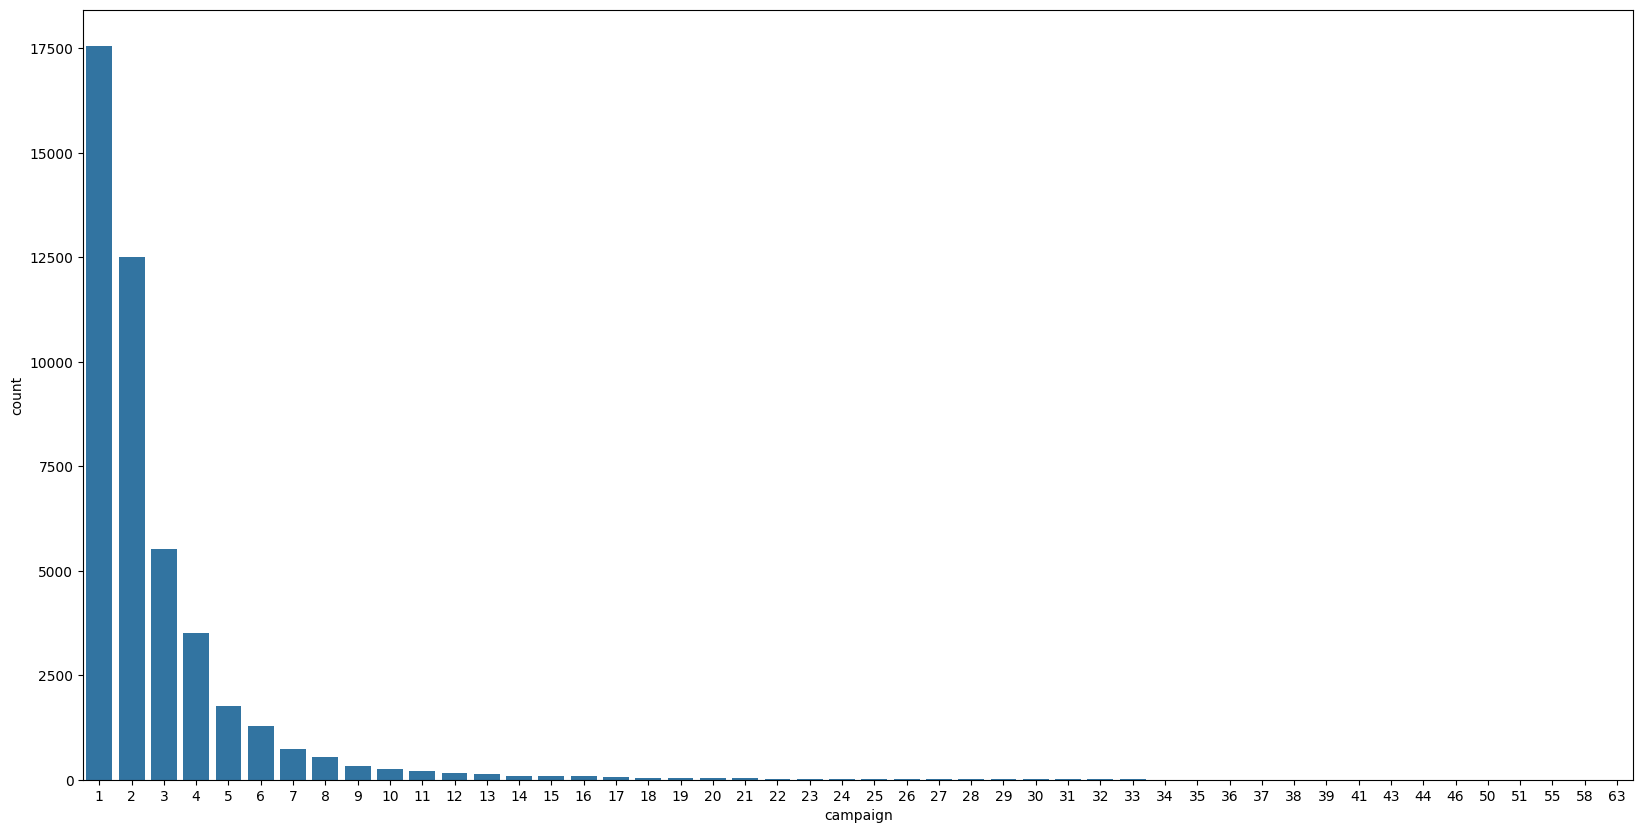

In [90]:
plt.figure(figsize = (20,10))
sns.countplot(data = train_df,x = 'campaign')

In [91]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,log-age,boxcox-transforme-age,balance_log,balance_power,balance_zero_flag,balance_transformed,weeks
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,4.077537,1.387699,7.670429,0.414773,0,7.670429,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,3.806662,1.376659,3.401197,-0.410774,0,3.401197,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,3.526361,1.364587,1.098612,-0.431122,0,1.098612,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,3.871201,1.379355,7.317876,0.197685,0,7.317876,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,3.526361,1.364587,0.693147,-0.432119,0,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,unknown,yes,3.951244,1.382644,6.716595,-0.052398,0,6.716595,3
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,unknown,yes,4.276666,1.395293,7.455877,0.275122,0,7.455877,3
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,3,success,yes,4.290459,1.395801,8.651025,1.495765,0,8.651025,3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,unknown,no,4.060443,1.387025,6.505784,-0.114235,0,6.505784,3


In [92]:
train_df['pdays'].value_counts()

,count
pdays,
-1,36954
182,167
92,147
91,126
183,126
...,...
449,1
452,1
648,1


<Axes: xlabel='pdays', ylabel='Count'>

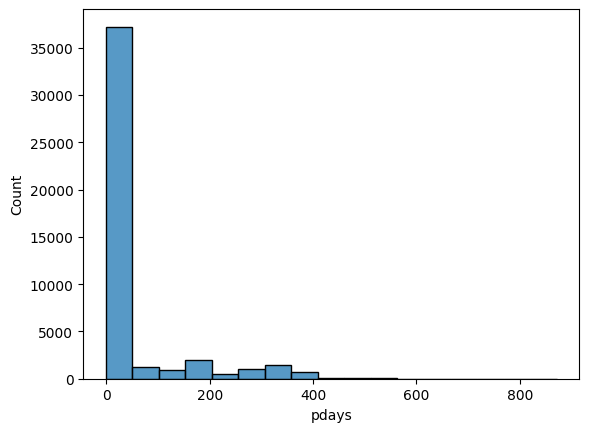

In [93]:
sns.histplot(data = train_df,x = 'pdays')

In [94]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-age', 'boxcox-transforme-age',
       'balance_log', 'balance_power', 'balance_zero_flag',
       'balance_transformed', 'weeks'],
      dtype='object')

In [95]:
train_df['previous'].value_counts()/train_df.shape[0]*100

,count
previous,
0,81.736745
1,6.131251
2,4.658158
3,2.525934
4,1.579262
5,1.015240
6,0.612683
7,0.453429
8,0.285329


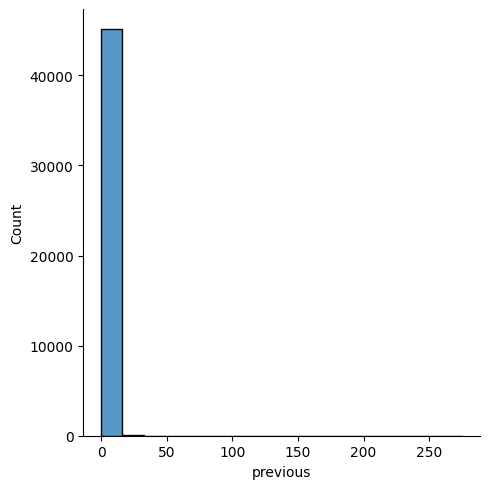

In [96]:
sns.displot(data = train_df['previous'])

In [97]:
def map_previous(x):
    if x == 0:
        return 0
    else:
        return 1
train_df['mapped_previous'] = train_df['previous'].apply(lambda x: map_previous(x))
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,log-age,boxcox-transforme-age,balance_log,balance_power,balance_zero_flag,balance_transformed,weeks,mapped_previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,unknown,no,4.077537,1.387699,7.670429,0.414773,0,7.670429,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,unknown,no,3.806662,1.376659,3.401197,-0.410774,0,3.401197,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,unknown,no,3.526361,1.364587,1.098612,-0.431122,0,1.098612,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,unknown,no,3.871201,1.379355,7.317876,0.197685,0,7.317876,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,unknown,no,3.526361,1.364587,0.693147,-0.432119,0,0.693147,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,unknown,yes,3.951244,1.382644,6.716595,-0.052398,0,6.716595,3,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,unknown,yes,4.276666,1.395293,7.455877,0.275122,0,7.455877,3,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,success,yes,4.290459,1.395801,8.651025,1.495765,0,8.651025,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,unknown,no,4.060443,1.387025,6.505784,-0.114235,0,6.505784,3,0


In [98]:
test_df['mapped_previous'] = test_df['previous'].apply(lambda x: map_previous(x))
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,log-age,balance_log,balance_power,balance_zero_flag,balance_transformed,weeks,mapped_previous
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,unknown,no,3.433987,7.488853,0.282211,0,7.488853,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,4,failure,no,3.526361,8.474286,1.209846,0,8.474286,2,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,failure,no,3.583519,7.208600,0.130429,0,7.208600,3,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,unknown,no,3.433987,7.297768,0.174936,0,7.297768,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,unknown,no,4.094345,0.000000,-0.445382,1,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,0,unknown,no,3.526361,NaN,-1.340442,1,-5.811141,5,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,0,unknown,no,4.060443,NaN,-13.487834,1,-8.105911,2,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,0,unknown,no,4.060443,5.690359,-0.283836,0,5.690359,3,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,3,other,no,3.367296,7.037028,0.053555,0,7.037028,1,1


In [99]:
train_df['poutcome'].value_counts()/train_df.shape[0]*100

,count
poutcome,
unknown,81.747805
failure,10.840282
other,4.069806
success,3.342107


In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    45211 non-null  int64  
 1   job                    45211 non-null  object 
 2   marital                45211 non-null  object 
 3   education              45211 non-null  object 
 4   default                45211 non-null  object 
 5   balance                45211 non-null  int64  
 6   housing                45211 non-null  object 
 7   loan                   45211 non-null  object 
 8   contact                45211 non-null  object 
 9   day                    45211 non-null  int64  
 10  month                  45211 non-null  object 
 11  duration               45211 non-null  int64  
 12  campaign               45211 non-null  int64  
 13  pdays                  45211 non-null  int64  
 14  previous               45211 non-null  int64  
 15  po

In [101]:
train_df.drop(['age','boxcox-transforme-age','balance','balance_log','balance_power','previous','day'],axis = 1,inplace = True)

In [102]:
test_df.drop(['age','balance','balance_log','balance_power','previous','day'],axis = 1,inplace = True)

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job                  45211 non-null  object 
 1   marital              45211 non-null  object 
 2   education            45211 non-null  object 
 3   default              45211 non-null  object 
 4   housing              45211 non-null  object 
 5   loan                 45211 non-null  object 
 6   contact              45211 non-null  object 
 7   month                45211 non-null  object 
 8   duration             45211 non-null  int64  
 9   campaign             45211 non-null  int64  
 10  pdays                45211 non-null  int64  
 11  poutcome             45211 non-null  object 
 12  y                    45211 non-null  object 
 13  log-age              45211 non-null  float64
 14  balance_zero_flag    45211 non-null  int64  
 15  balance_transformed  45211 non-null 

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job                  4521 non-null   object 
 1   marital              4521 non-null   object 
 2   education            4521 non-null   object 
 3   default              4521 non-null   object 
 4   housing              4521 non-null   object 
 5   loan                 4521 non-null   object 
 6   contact              4521 non-null   object 
 7   month                4521 non-null   object 
 8   duration             4521 non-null   int64  
 9   campaign             4521 non-null   int64  
 10  pdays                4521 non-null   int64  
 11  poutcome             4521 non-null   object 
 12  y                    4521 non-null   object 
 13  log-age              4521 non-null   float64
 14  balance_zero_flag    4521 non-null   int64  
 15  balance_transformed  4521 non-null   f

In [105]:
train_df['mapped_previous'].value_counts()

,count
mapped_previous,
0,36954
1,8257


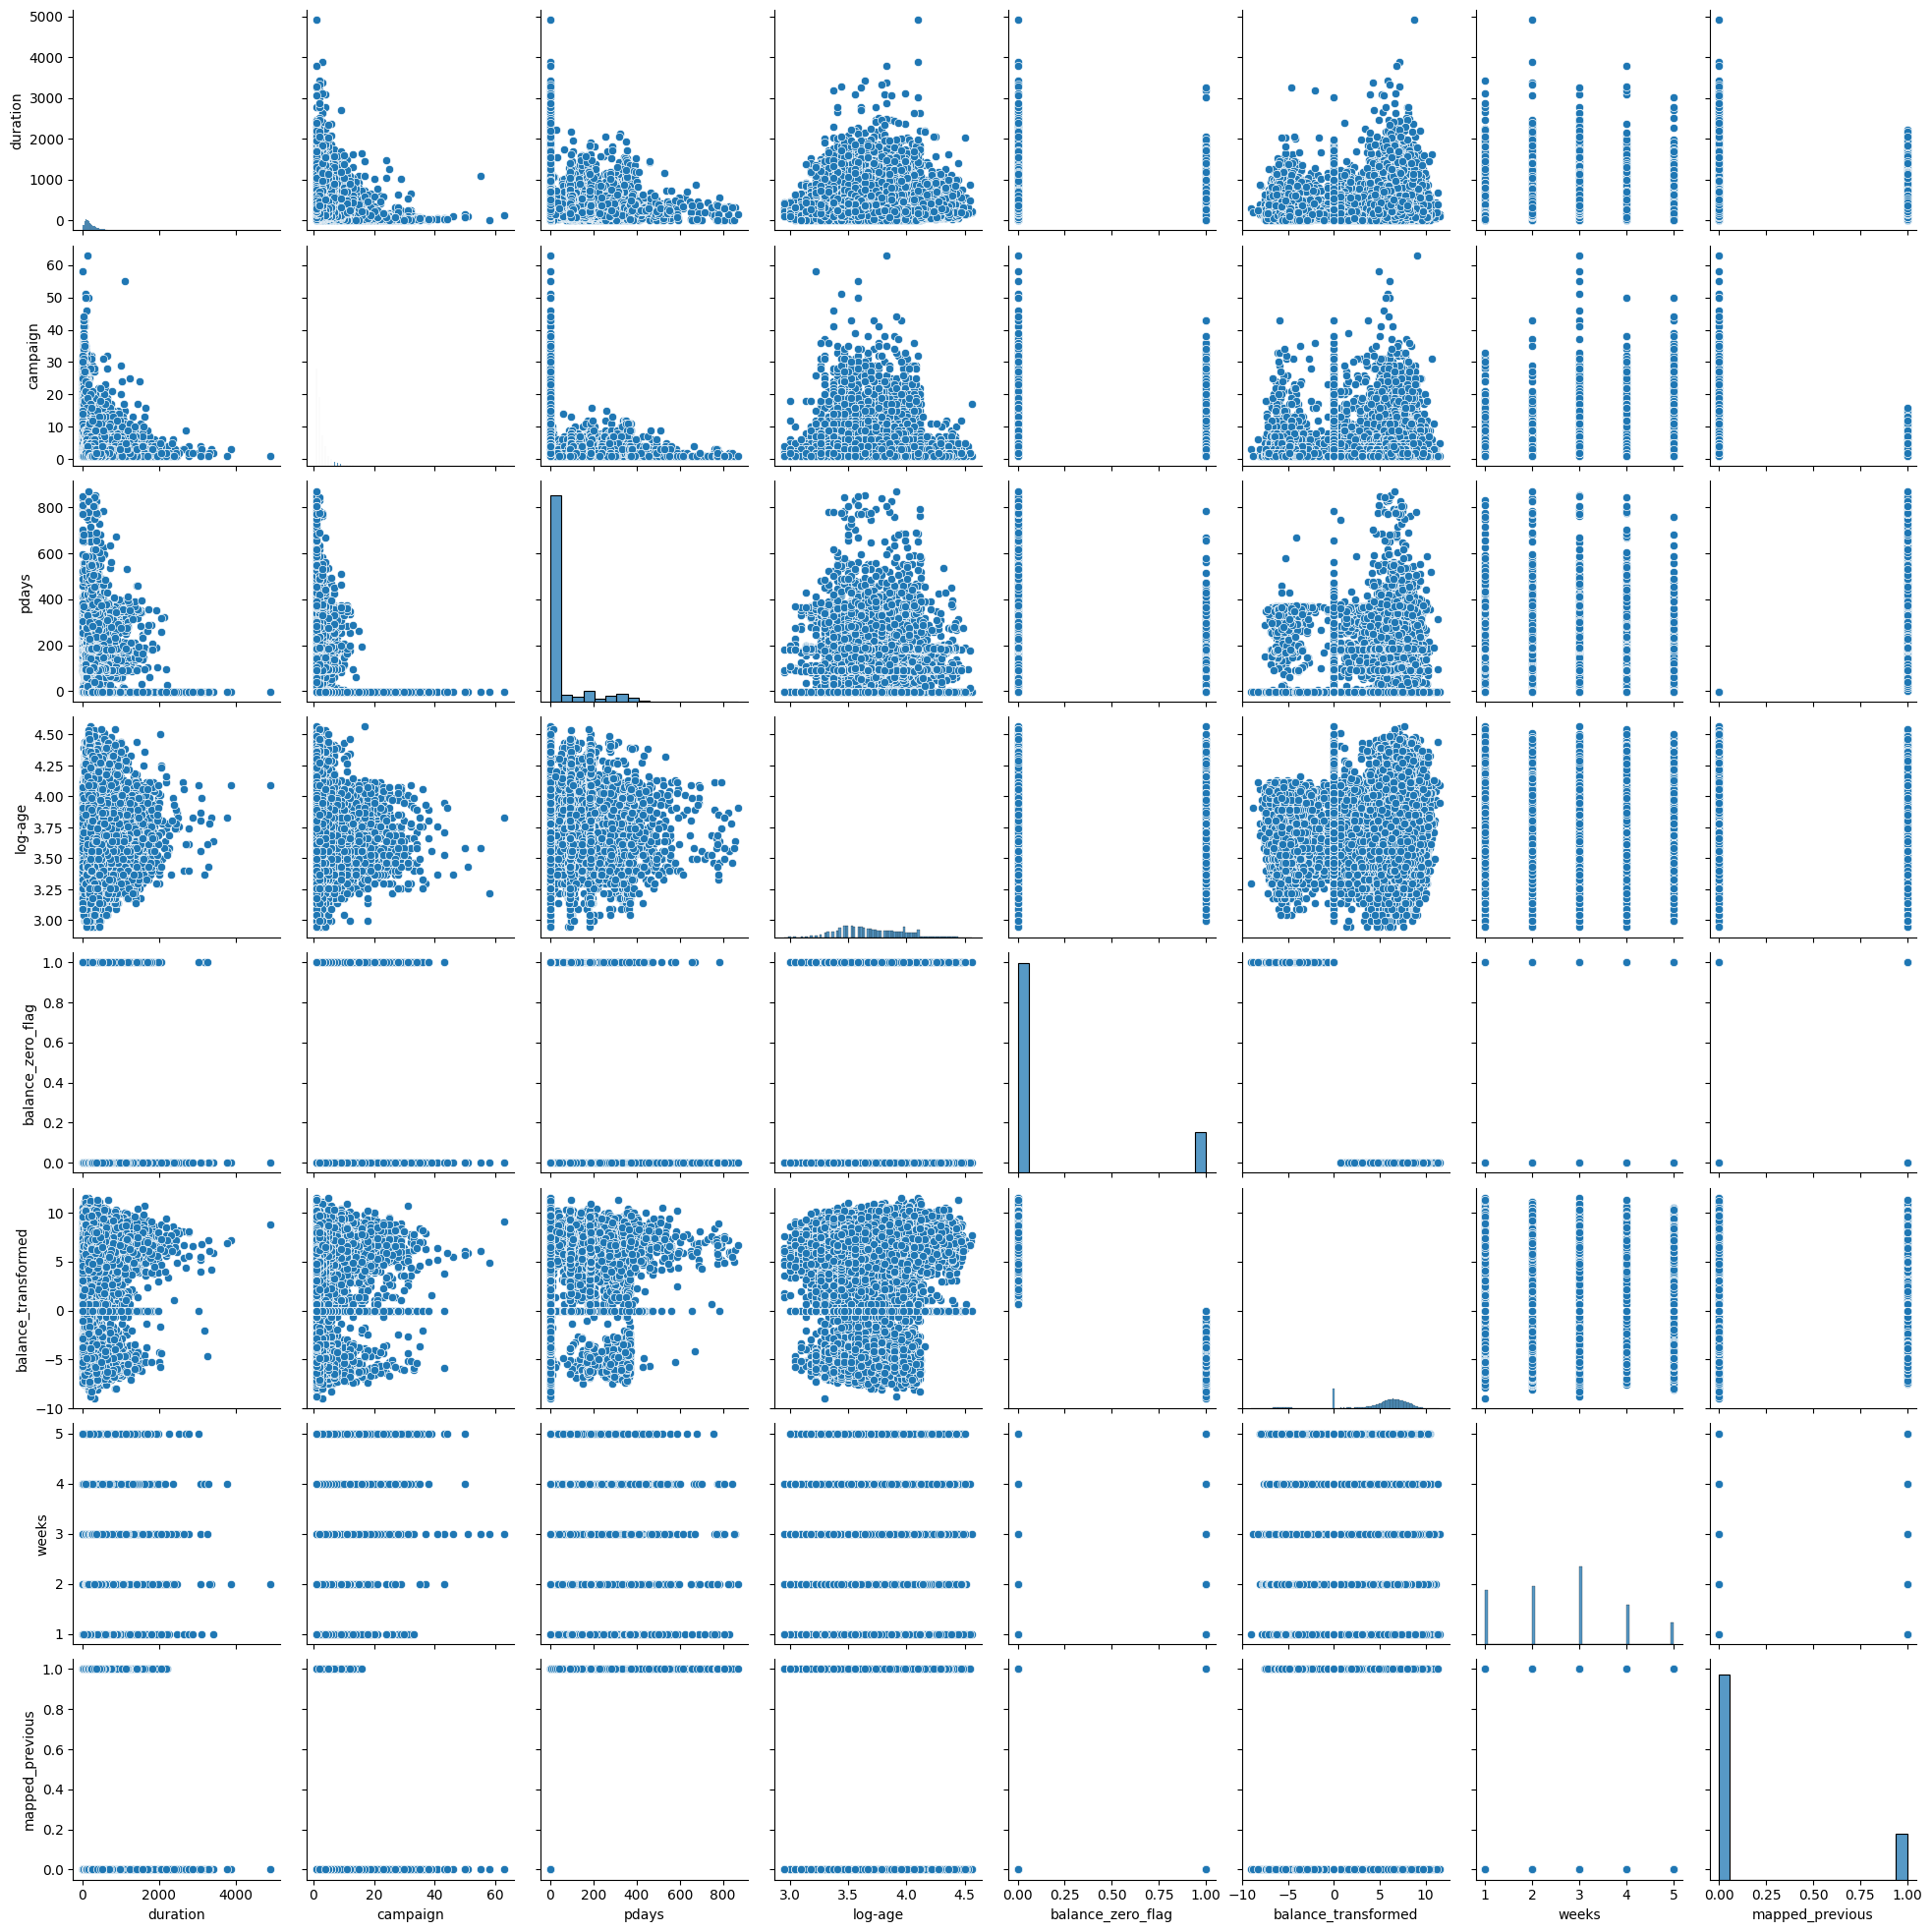

In [106]:
sns.pairplot(data = train_df)

In [107]:
train_df['y'].value_counts()/train_df.shape[0]*100

,count
y,
no,88.30152
yes,11.69848


In [108]:
x_train = train_df.drop('y',axis = 1)
x_train

,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,log-age,balance_zero_flag,balance_transformed,weeks,mapped_previous
0,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,unknown,4.077537,0,7.670429,1,0
1,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,unknown,3.806662,0,3.401197,1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,unknown,3.526361,0,1.098612,1,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,unknown,3.871201,0,7.317876,1,0
4,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,unknown,3.526361,0,0.693147,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,977,3,-1,unknown,3.951244,0,6.716595,3,0
45207,retired,divorced,primary,no,no,no,cellular,nov,456,2,-1,unknown,4.276666,0,7.455877,3,0
45208,retired,married,secondary,no,no,no,cellular,nov,1127,5,184,success,4.290459,0,8.651025,3,1
45209,blue-collar,married,secondary,no,no,no,telephone,nov,508,4,-1,unknown,4.060443,0,6.505784,3,0


In [109]:
x_test = test_df.drop('y',axis = 1)
x_test

,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,log-age,balance_zero_flag,balance_transformed,weeks,mapped_previous
0,unemployed,married,primary,no,no,no,cellular,oct,79,1,-1,unknown,3.433987,0,7.488853,3,0
1,services,married,secondary,no,yes,yes,cellular,may,220,1,339,failure,3.526361,0,8.474286,2,1
2,management,single,tertiary,no,yes,no,cellular,apr,185,1,330,failure,3.583519,0,7.208600,3,1
3,management,married,tertiary,no,yes,yes,unknown,jun,199,4,-1,unknown,3.433987,0,7.297768,1,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,226,1,-1,unknown,4.094345,1,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,329,5,-1,unknown,3.526361,1,-5.811141,5,0
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,153,1,-1,unknown,4.060443,1,-8.105911,2,0
4518,technician,married,secondary,no,no,no,cellular,aug,151,11,-1,unknown,4.060443,0,5.690359,3,0
4519,blue-collar,married,secondary,no,no,no,cellular,feb,129,4,211,other,3.367296,0,7.037028,1,1


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job                  45211 non-null  object 
 1   marital              45211 non-null  object 
 2   education            45211 non-null  object 
 3   default              45211 non-null  object 
 4   housing              45211 non-null  object 
 5   loan                 45211 non-null  object 
 6   contact              45211 non-null  object 
 7   month                45211 non-null  object 
 8   duration             45211 non-null  int64  
 9   campaign             45211 non-null  int64  
 10  pdays                45211 non-null  int64  
 11  poutcome             45211 non-null  object 
 12  y                    45211 non-null  object 
 13  log-age              45211 non-null  float64
 14  balance_zero_flag    45211 non-null  int64  
 15  balance_transformed  45211 non-null 

In [111]:
y_train = train_df['y']
y_train

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [112]:
y_test = test_df['y']
y_test

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


In [113]:
train_df.columns.to_list()
list(train_df['y'].unique())

['no', 'yes']

In [114]:
# feature_names = train_df.columns.to_list()
# class_names = list(train_df['y'].unique())
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# clf = DecisionTreeClassifier()
# clf.fit(x_train, y_train)


# # Export the decision tree to a dot file
# dot_data = export_graphviz(clf, out_file=None,
#                            feature_names=feature_names,
#                            class_names=class_names,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Create a Graphviz Source object and render the decision tree
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Creates a file named 'decision_tree.pdf'
# graph.view()

In [115]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz

# # Load sample data (Iris dataset)
# iris = load_iris()
# print(type(iris))
# X = iris.data
# y = iris.target
# feature_names = iris.feature_names
# class_names = iris.target_names
# print(feature_names)
# print(class_names)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(X_train)

# # Create and train the decision tree model
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)

# # Export the decision tree to a dot file
# dot_data = export_graphviz(clf, out_file=None,
#                            feature_names=feature_names,
#                            class_names=class_names,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Create a Graphviz Source object and render the decision tree
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Creates a file named 'decision_tree.pdf'
# graph.view()  # Opens the generated PDF file


In [116]:
train_df
categorical_cols = x_train.select_dtypes(include = ['object']).columns.tolist()
numeric_cols = x_train.select_dtypes(include = ['number']).columns.tolist()
print(categorical_cols)
print(numeric_cols)



['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['duration', 'campaign', 'pdays', 'log-age', 'balance_zero_flag', 'balance_transformed', 'weeks', 'mapped_previous']


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [118]:
x_train.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'poutcome', 'log-age',
       'balance_zero_flag', 'balance_transformed', 'weeks', 'mapped_previous'],
      dtype='object')

In [119]:
x_test.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'poutcome', 'log-age',
       'balance_zero_flag', 'balance_transformed', 'weeks', 'mapped_previous'],
      dtype='object')

In [120]:
preprocessor = ColumnTransformer(
transformers= [
    ('num',StandardScaler(),numeric_cols),
    ('cat',OneHotEncoder(drop = 'first'),categorical_cols)])

In [121]:
print(x_train.columns)
x_train_processed = preprocessor.fit_transform(x_train)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'poutcome', 'log-age',
       'balance_zero_flag', 'balance_transformed', 'weeks', 'mapped_previous'],
      dtype='object')


In [122]:
x_test_processed = preprocessor.transform(x_test)

In [123]:
x_train_processed

array([[ 0.0110161 , -0.56935064, -0.41145311, ...,  0.        ,
         0.        ,  1.        ],
       [-0.41612696, -0.56935064, -0.41145311, ...,  0.        ,
         0.        ,  1.        ],
       [-0.70736086, -0.56935064, -0.41145311, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.37379688,  0.72181052,  1.43618859, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97014641,  0.39902023, -0.41145311, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39932797, -0.24656035,  1.4761376 , ...,  1.        ,
         0.        ,  0.        ]])

In [124]:
import pickle
# Fit the preprocessor on the training data (if you haven't done it already)
preprocessor.fit(x_train)  # X_train is your training dataset

# Save the preprocessor to a file using pickle
pickle.dump(preprocessor, open("preprocessor.sav", 'wb'))

# Save the preprocessor to a file using pickle
pickle.dump(preprocessor, open("preprocessor.sav", 'wb'))

In [125]:
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
encoded_cols


array(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [126]:
numeric_cols

['duration',
 'campaign',
 'pdays',
 'log-age',
 'balance_zero_flag',
 'balance_transformed',
 'weeks',
 'mapped_previous']

In [127]:
columns = numeric_cols + list(encoded_cols)
columns

['duration',
 'campaign',
 'pdays',
 'log-age',
 'balance_zero_flag',
 'balance_transformed',
 'weeks',
 'mapped_previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [128]:
x_train_final = pd.DataFrame(x_train_processed, columns = columns)
x_test_final = pd.DataFrame(x_test_processed,columns = columns)

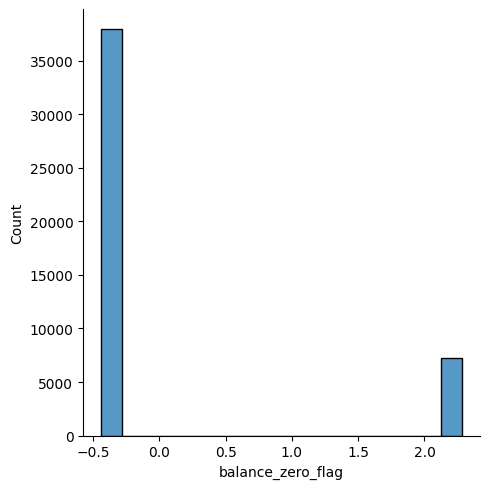

In [129]:
sns.displot(x_train_final['balance_zero_flag'])


In [130]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res,y_train_res = smote.fit_resample(x_train_final,y_train)

In [131]:
x_train_res.shape,x_test_final.shape

((79844, 43), (4521, 43))

In [132]:
y_train

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [133]:
y_train,y_test

(0         no
 1         no
 2         no
 3         no
 4         no
         ... 
 45206    yes
 45207    yes
 45208    yes
 45209     no
 45210     no
 Name: y, Length: 45211, dtype: object,
 0       no
 1       no
 2       no
 3       no
 4       no
         ..
 4516    no
 4517    no
 4518    no
 4519    no
 4520    no
 Name: y, Length: 4521, dtype: object)

In [134]:
## feature_names = columns
# print(feature_names)
import graphviz
feature_names = columns
class_names = ['yes','no']
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(x_train_final, y_train)


# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz Source object and render the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_trees")  # Creates a file named 'decision_tree.pdf'
graph.view()

'decision_trees.pdf'

In [135]:
x_train_res.shape,x_test_final.shape,y_train_res.shape,y_test.shape

((79844, 43), (4521, 43), (79844,), (4521,))

In [136]:
x_train_res.columns,y_train_res

(Index(['duration', 'campaign', 'pdays', 'log-age', 'balance_zero_flag',
        'balance_transformed', 'weeks', 'mapped_previous', 'job_blue-collar',
        'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
        'job_self-employed', 'job_services', 'job_student', 'job_technician',
        'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
        'education_secondary', 'education_tertiary', 'education_unknown',
        'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
        'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
        'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
        'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
        'poutcome_unknown'],
       dtype='object'),
 0         no
 1         no
 2         no
 3         no
 4         no
         ... 
 79839    yes
 79840    yes
 79841    yes
 79842    yes
 79843    yes
 Name: y, Length: 79844, dtype: object)

In [137]:
clf.fit(x_train_res,y_train_res)
y_pred = clf.predict(x_test_final)

In [138]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_pred,y_test)
print(conf_matrix)

[[4000    0]
 [   0  521]]


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)
y_pred1 = logreg.predict(x_test_final)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

          no       0.85      0.97      0.90      3496
         yes       0.79      0.40      0.53      1025

    accuracy                           0.84      4521
   macro avg       0.82      0.68      0.72      4521
weighted avg       0.83      0.84      0.82      4521



In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_res, y_train_res)
# Predict on the test set
y_pred2 = rf.predict(x_test_final)


In [143]:
conf_matrix = confusion_matrix(y_pred2,y_test)
conf_matrix
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [144]:
from sklearn.model_selection import cross_val_score, train_test_split
cv_scores = cross_val_score(rf, x_train_res, y_train_res, cv=10, scoring='accuracy')

In [145]:
cv_scores

array([0.80726362, 0.92961803, 0.8956794 , 0.90407013, 0.9367485 ,
       0.94100701, 0.91883768, 0.84481463, 0.84368737, 0.71968938])

In [146]:
input = [30,'unemployed','married','primary','no',0,'no','no','cellular',19,'oct',79,1,-1,0,'unknown']
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#print(input_data_reshaped)
def deployment(input):

  column = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
  my_dict = {}
  for i in range(len(column)):
    my_dict[column[i]] = input[i]
    my_input = pd.DataFrame(my_dict,index = [0])
  my_input['log-age'] = np.log1p(my_input['age'])
  my_input['balance_zero_flag'] = (my_input['balance'] <= threshold).astype(int)
  my_input['balance_transformed'] = my_input['balance'].apply(lambda x:transformation_balance(x))
  my_input['weeks'] = my_input['day'].apply(lambda x:map_week(x))
  my_input['mapped_previous'] = my_input['previous'].apply(lambda x: map_previous(x))
  my_input.drop(['age','balance','previous','day'],axis = 1,inplace = True)
  my_input_processed = preprocessor.transform(my_input)
  categorical_cols = my_input.select_dtypes(include = ['object']).columns.tolist()

  encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
  numeric_cols = my_input.select_dtypes(include = ['number']).columns.tolist()
  columns = numeric_cols + list(encoded_cols)
  my_input_processed = pd.DataFrame(my_input_processed,columns = columns)


  output = rf.predict(my_input_processed)
  return my_input_processed
deployment(input)


,duration,campaign,pdays,log-age,balance_zero_flag,balance_transformed,weeks,mapped_previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.695712,-0.569351,-0.411453,-1.092329,2.282609,-1.283507,0.271601,-0.472694,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
